## Inference

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from crackseg.models import UNet
from inference import preprocess
# from crackseg.utils.dataset2 import CrackAugment

import crackseg.utils.augmentation
from crackseg.utils.dataset2 import CrackAugment

In [24]:
# Load model weights

model_weight = "../weights/finetuned-all-occlude.pt"
# model_weight = "../weights/finetuned-all-occlude-color.pt"
# model_weight = "../weights/pretrained.pt"

# Load weight
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load(model_weight, map_location=device)

# Initialize model and load checkpoint
model = UNet(in_channels=3, out_channels=2)
model.load_state_dict(checkpoint["model"].float().state_dict())

<All keys matched successfully>

In [34]:
# Load input image

# input_path = "../data/Data3.26.2024/Test.jpg"
# input_path = "../data/Data3.26.2024/image.png"
# input_path = "../data/Data3.26.2024/captu222re.jpg"
input_path = "../data/Data3.26.2024/ca212pt2323ure.jpg"

# get from file
input_image = Image.open(input_path).convert('RGB')
input_image = input_image.resize((240, 240))
tensor_image = torch.from_numpy(preprocess(input_image, is_mask=False))
tensor_image = tensor_image.unsqueeze(0)
tensor_image = tensor_image.to(device, dtype=torch.float32)

In [35]:
# Offset prediction threshold, more positive predicts crack label more. often
SENSITIVITY = -10

model.eval()
model.to(device)

# inference
with torch.no_grad():
    output = model(tensor_image).cpu()
    # output = output.argmax(dim=1)
    output = output[:,0,:,:] < output[:,1,:,:] + SENSITIVITY

mask = output[0].long().squeeze().numpy()

(-0.5, 239.5, 239.5, -0.5)

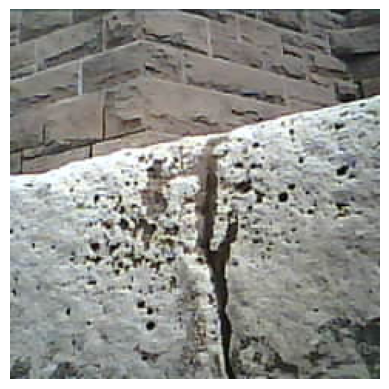

In [36]:
# show the input image
plt.imshow(np.moveaxis(np.squeeze(np.array(tensor_image.cpu())), 0, 2))
plt.axis('off')

(-0.5, 239.5, 239.5, -0.5)

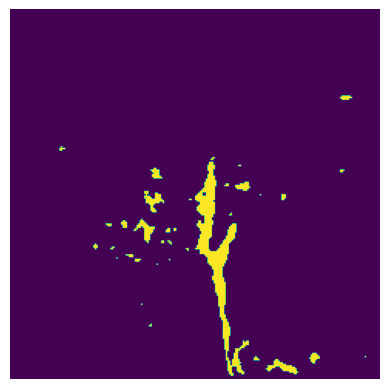

In [37]:
# show the prediction mask
result = Image.fromarray((mask * 255).astype(np.uint8))
plt.imshow(np.array(result))
plt.axis('off')
# print(np.sum(np.array(result)))